In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('./vgg16_occlusion_scores.pkl', 'rb') as f:
    vgg16_occlusion_scores = pickle.load(f)

with open('./vit_base_occlusion_scores.pkl', 'rb') as f:
    vit_base_occlusion_scores = pickle.load(f)

In [16]:
reference_basic=0.67; 
reference_name_basic='Rensink & Enns 1998 (Basic Occlusion)';
reference_mi_depth=0.6; 
reference_name_depth='Rensink & Enns 1998 (Depth Ordering Occlusion)';

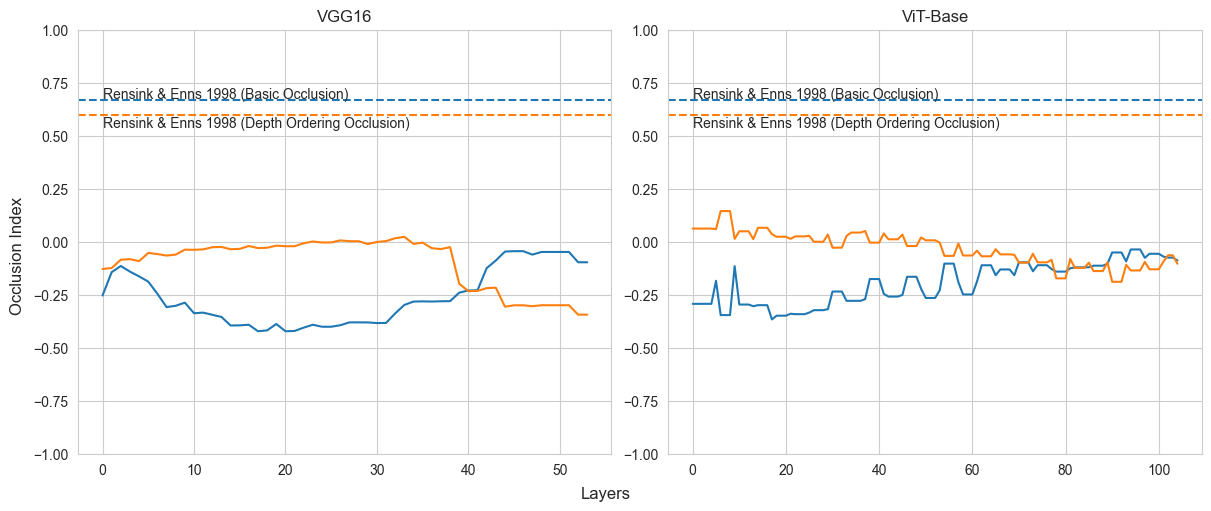

In [20]:
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 5))

ax1_layer_inds = np.arange(len(vgg16_occlusion_scores['basic']))
sns.lineplot(x=ax1_layer_inds, y=vgg16_occlusion_scores['basic'], ax=ax1)
sns.lineplot(x=ax1_layer_inds, y=vgg16_occlusion_scores['depth'], ax=ax1)
ax1.axhline(y=reference_basic, color=colors[0], linestyle='--')
ax1.text(0, reference_basic+0.06, reference_name_basic, verticalalignment='top', horizontalalignment='left')
ax1.axhline(y=reference_mi_depth, color=colors[1], linestyle='--')
ax1.text(0, reference_mi_depth-0.01, reference_name_depth, verticalalignment='top', horizontalalignment='left')


ax1.set_ylim(-1,1)
ax1.set_title('VGG16')

ax2_layer_inds = np.arange(len(vit_base_occlusion_scores['basic']))
sns.lineplot(x=ax2_layer_inds, y=vit_base_occlusion_scores['basic'], ax=ax2)
sns.lineplot(x=ax2_layer_inds, y=vit_base_occlusion_scores['depth'], ax=ax2)
ax2.axhline(y=reference_basic, color=colors[0], linestyle='--')
ax2.text(0, reference_basic+0.06, reference_name_basic, verticalalignment='top', horizontalalignment='left')
ax2.axhline(y=reference_mi_depth, color=colors[1], linestyle='--')
ax2.text(0, reference_mi_depth-0.01, reference_name_depth, verticalalignment='top', horizontalalignment='left')

ax2.set_ylim(-1,1)
ax2.set_title('ViT-Base')

fig.supxlabel('Layers')
fig.supylabel("Occlusion Index")



plt.show()